<a href="https://colab.research.google.com/github/SimpleAssociate/Machine_Learning/blob/master/Real_estate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Actual: 1420000.0 Prediction: 1675709.5228904784
Actual: 4900000.0 Prediction: 6075770.417242942
Actual: 958000.0 Prediction: 1016450.7689589653
Actual: 1940000.0 Prediction: 3034961.0978805013
Actual: 1350000.0 Prediction: 734247.7958802336
Actual: 2100000.0 Prediction: 2697459.588416589
Actual: 1280000.0 Prediction: 1047885.3965787173
Actual: 1800000.0 Prediction: 2158728.3814082756
Actual: 790000.0 Prediction: 643930.9497006249
Actual: 1300000.0 Prediction: 779406.2189700382
Actual: 3500000.0 Prediction: 3884190.0629770304
Actual: 4350000.0 Prediction: 4238599.341659298
Actual: 1010000.0 Prediction: 833345.7156695996
Actual: 960000.0 Prediction: 1680103.3198359802
Actual: 1350000.0 Prediction: 1208967.398945445
Actual: 745000.0 Prediction: 395485.2802416072
Actual: 1905000.0 Prediction: 3365529.44341693
Actual: 1360000.0 Prediction: 2672890.1186724864
Actual: 4575000.0 Prediction: 3198107.7009115224
Actual: 3405000.0 Prediction: 390

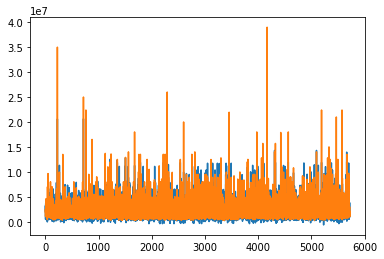

In [52]:
import numpy as np
import pandas as pd 
import keras 
import os 
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt 





DATA = pd.read_csv("real_estate_kaggle.csv")

areas = DATA['area'].values
rooms = DATA['rooms'].values
suites = DATA['suites'].values 
bathrooms = DATA['bathrooms'].values
parkings = DATA['parkings'].values 

prices = DATA['price'].values 



size = len(prices)
train_size = int(.67 * size)
test_size = size - train_size

for i in range(0,size): 
    try: 
        var = float(areas[i])
        var = int(areas[i])
    except: 
        areas[i] = 0


    try: 
        var = int(rooms[i])
    except: 
        rooms[i] = 0

    try: 
        var = int(suites[i])
    except: 
        suites[i] = 0

    try: 
        var = int(bathrooms[i])
    except: 
        bathrooms[i] = 0

    try: 
        var = int(parkings[i])
    except: 
        parkings[i] = 0 

    try: 
        var = float(prices[i])
    
    except: 
        prices[i] = 0
        


train_area = areas[:train_size]
test_area = areas[train_size:]

train_rooms = rooms[:train_size]
test_rooms = rooms[train_size:]

train_suites = suites[:train_size]
test_suites = suites[train_size:]

train_bath = bathrooms[:train_size]
test_bath = bathrooms[train_size:]

train_park = parkings[:train_size]
test_park = parkings[train_size:]

train_price = prices[:train_size]
test_price = prices[train_size:]


train_data = pd.DataFrame({
    "areas" : train_area, 
    "rooms" : train_rooms, 
    "suites" :train_suites, 
    "bathrooms" : train_bath, 
    "parking" : train_park,
    "prices" : train_price
})


test_data = pd.DataFrame({

    "areas" : test_area, 
    "rooms" : test_rooms,
    "suites" : test_suites,
    "bathrooms" : test_bath,
    "parking" : test_park,
    "prices" : test_price

 
})

X_train = train_data[['areas' , 'rooms', 'suites', 'bathrooms' , 'parking']].values
Y_train = train_data['prices'].values

X_test = test_data[['areas', 'rooms' , 'suites' , 'bathrooms' , 'parking']].values
Y_test = test_data['prices'].values

model = LinearRegression()

model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)



MSE = mean_squared_error(Y_test, Y_predict) 

RMSE = math.sqrt(MSE)

print(f"RMSE: {RMSE} ")

plt.plot(Y_predict)
for i in range(0, len(Y_test)):

   print(f"Actual: {Y_test[i]} Prediction: {Y_predict[i]}")


plt.plot(Y_test)
plt.show()

